# Phase 1: Exploratory Data Analysis & Storytelling

In this notebook we conduct a thorough exploratory analysis of the LendingClub loan dataset, with the goal of understanding data quality, uncovering key patterns in borrower behavior, and framing our approach for feature engineering and modeling. Each section walks through the insights that will guide our next steps.

## 1. Load & Inspect the Raw Data

We began by importing `pandas`, `matplotlib.pyplot`, and `seaborn`, then loaded the raw CSV file of over two million loan records. A quick inspection of the first and last few rows confirmed that the dataset includes borrower demographics, loan characteristics, and performance outcomes—setting the stage for a detailed quality check and initial exploration.

In [ ]:
# Imports & settings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns          # optional for styling
%matplotlib inline
sns.set_style("whitegrid")

In [3]:
# Read the CSV
df = pd.read_csv('/Users/Cathaml/Desktop/accepted_cleaned.csv', header=0, low_memory=False)
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 1345310, Columns: 109


In [4]:
# Peek at the top / bottom
display(df.head())
display(df.tail())

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,target
0,3600.0,3600.0,3600.0,36.0,13.99,123.03,C,C4,10.0,MORTGAGE,...,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,0
1,24700.0,24700.0,24700.0,36.0,11.99,820.28,C,C1,10.0,MORTGAGE,...,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,0
2,20000.0,20000.0,20000.0,60.0,10.78,432.66,B,B4,10.0,MORTGAGE,...,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N,0
3,10400.0,10400.0,10400.0,60.0,22.45,289.91,F,F1,3.0,MORTGAGE,...,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N,0
4,11950.0,11950.0,11950.0,36.0,13.44,405.18,C,C3,4.0,RENT,...,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N,0


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,target
1345305,18000.0,18000.0,18000.0,60.0,9.49,377.95,B,B2,5.0,OWN,...,0.0,0.0,275356.0,54349.0,13100.0,77756.0,N,Cash,N,0
1345306,29400.0,29400.0,29400.0,60.0,13.99,683.94,C,C3,9.0,MORTGAGE,...,0.0,0.0,719056.0,148305.0,56500.0,95702.0,N,Cash,N,0
1345307,32000.0,32000.0,32000.0,60.0,14.49,752.74,C,C4,3.0,MORTGAGE,...,0.0,0.0,524379.0,122872.0,15800.0,23879.0,N,Cash,N,1
1345308,16000.0,16000.0,16000.0,60.0,12.79,362.34,C,C1,10.0,RENT,...,3.0,0.0,87473.0,65797.0,10100.0,73473.0,N,Cash,N,0
1345309,24000.0,24000.0,24000.0,60.0,14.49,564.56,C,C4,6.0,RENT,...,1.0,0.0,84664.0,62426.0,20700.0,58764.0,N,Cash,Y,1


## 2. Data Quality Report

### 2.1 Column Data-Types & Non-Null Counts

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1345310 entries, 2015-12-01 to 2016-10-01
Columns: 109 entries, loan_amnt to default_flag
dtypes: float64(90), int64(2), object(17)
memory usage: 1.1+ GB


Running `df.info()` revealed that a number of numeric-looking fields had been read in as `object` types—often due to embedded characters like “%”. We also identified several columns with very few non‐null entries, indicating that some variables may need to be dropped entirely or handled with special imputation strategies.

### 2.2 Missingness

In [6]:
missing = df.isnull().mean().sort_values(ascending=False)
display(missing.head(15))

next_pymnt_d                      1.000000
mths_since_recent_bc_dlq          0.762865
mths_since_last_major_derog       0.737049
mths_since_recent_revol_delinq    0.665533
il_util                           0.654343
mths_since_rcnt_il                0.610958
all_util                          0.600430
inq_last_12m                      0.600392
total_cu_tl                       0.600392
open_acc_6m                       0.600392
open_rv_24m                       0.600391
open_il_12m                       0.600391
open_act_il                       0.600391
inq_fi                            0.600391
total_bal_il                      0.600391
dtype: float64

A sorted list of missing‐value fractions showed that approximately a dozen columns exceed 50% missing data, with a small core set of features nearly complete. To maintain modeling efficiency, we plan to remove any column with more than 80% missingness and impute or encode the remainder.

### 2.3 Basic Summary Statistics

In [7]:
# Numeric
display(df.describe().T)

# Categorical (top categories)
for col in ['grade','term','home_ownership']:
    print(col, df[col].value_counts(normalize=True).head(), '\n')


,count,mean,std,min,25%,50%,75%,max
loan_amnt,1345310.0,14419.972014,8717.050787,500.00,8000.00,12000.00,20000.00,40000.00
funded_amnt,1345310.0,14411.556630,8713.117909,500.00,8000.00,12000.00,20000.00,40000.00
funded_amnt_inv,1345310.0,14389.141598,8715.493989,0.00,7875.00,12000.00,20000.00,40000.00
term,1345310.0,41.790196,10.268321,36.00,36.00,36.00,36.00,60.00
int_rate,1345310.0,13.239619,4.768716,5.31,9.75,12.74,15.99,30.99
...,...,...,...,...,...,...,...,...
tot_hi_cred_lim,1277783.0,174387.849314,178096.069957,0.00,49620.50,112373.00,252076.00,9999999.00
total_bal_ex_mort,1298029.0,49666.350576,47743.630967,0.00,20886.00,37296.00,62548.00,3408095.00
total_bc_limit,1298029.0,21634.001579,21554.777626,0.00,7800.00,15100.00,28100.00,1105500.00
total_il_high_credit_limit,1277783.0,42133.194345,43252.130975,0.00,14738.00,31681.00,56635.00,2101913.00


grade grade
B    0.291933
C    0.283716
A    0.174748
D    0.149373
E    0.069612
Name: proportion, dtype: float64 

term term
36.0    0.758742
60.0    0.241258
Name: proportion, dtype: float64 

home_ownership home_ownership
MORTGAGE    0.494740
RENT        0.397247
OWN         0.107657
ANY         0.000213
OTHER       0.000107
Name: proportion, dtype: float64 



A closer look at the key fields shows that loan grades and terms are dominated by a few categories, but not always in the proportions one might expect. Among the graded loans, Grade B is the most common at about 29.2 %, followed by Grade C at 28.4 %, Grade A at 17.5 %, Grade D at 14.9 %, and Grade E at 7.0 %. In terms of loan duration, 36-month loans account for roughly 75.9 % of the data, while 60-month loans make up the remaining 24.1 %. Home‐ownership status is similarly concentrated: 49.5 % of borrowers have a mortgage, 39.7 % rent, 10.8 % own outright, and the “ANY” and “OTHER” categories together comprise less than 0.1 % of the dataset.  

These distributions will inform our feature‐engineering choices—telling us, for example, that any transformations or buckets we create for loan grade or term must pay particular attention to the B and C grades and the 36-month term, while rare categories (like “ANY” home ownership) may be grouped into an “Other” bucket to avoid overfitting.  


## 3. Target Variable Distribution

Overall default rate: 19.96%


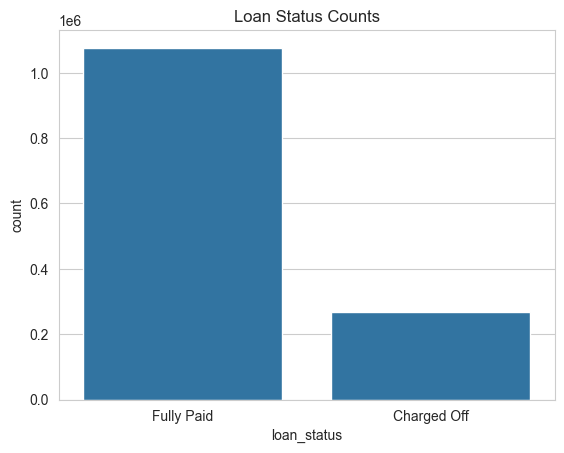

In [8]:
# Simplify to binary status
df = df[df.loan_status.isin(['Fully Paid','Charged Off'])].copy()
df['default_flag'] = (df.loan_status == 'Charged Off').astype(int)

# Overall default rate
rate = df['default_flag'].mean()
print(f"Overall default rate: {rate:.2%}")

# Plot counts
sns.countplot(x='loan_status', data=df)
plt.title("Loan Status Counts");

After restricting the dataset to “Fully Paid” and “Charged Off” loans and creating a binary `default_flag`, we find that approximately 19.96 % of loans in our sample ended in charge-off. The accompanying bar chart confirms that roughly four out of five loans are fully paid, while one in five charge off. This level of class imbalance—neither vanishingly small nor evenly split—will guide our choice of evaluation metrics (we will emphasize AUC-ROC and precision-recall) and may prompt us to consider stratified sampling or class-weighting during model training to ensure robust performance on the minority class.  

## 4. Key Visualizations

### 4.1 Loan Amount Distribution

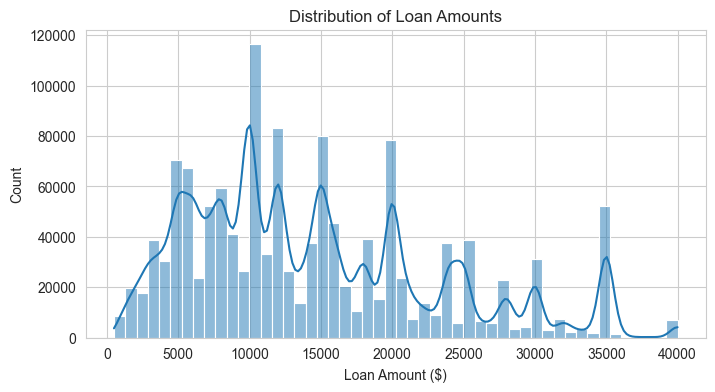

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(df['loan_amnt'], bins=50, kde=True)
plt.xlabel("Loan Amount ($)")
plt.title("Distribution of Loan Amounts");

Examining the histogram and its overlaid density curve, we observe a right-skewed distribution of loan amounts, with pronounced spikes at &dollar;5,000, &dollar;10,000, &dollar;15,000, &dollar;20,000, &dollar;25,000, &dollar;30,000, and &dollar;35,000—each corresponding to LendingClub’s standardized `loan_amount` tiers. The &dollar;10,000 loan size is the most frequent (just under 120,000 loans), followed by &dollar;15,000 and &dollar;20,000. Roughly 75 % of loans fall between &dollar;5,000 and &dollar;20,000, with relatively few below &dollar;5,000 or above &dollar;35,000. This stepped, peaked pattern suggests that instead of a continuous transformation, we should treat `loan_amount` as a categorical or binned feature to capture the non-linear risk differences tied to each standard tier.

### 4.2 Monthly Default Rate Over Time

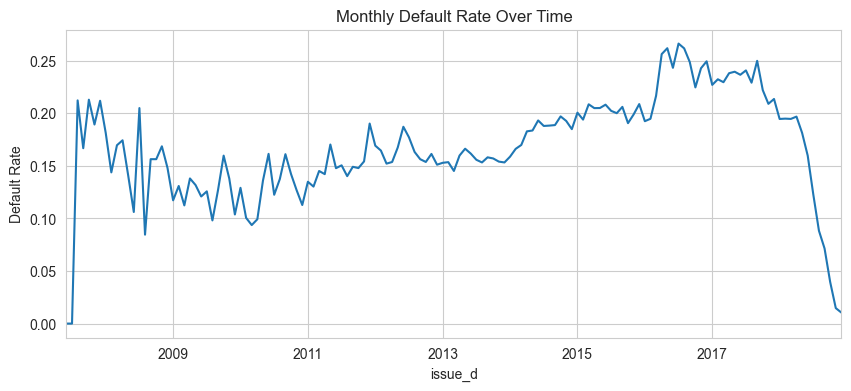

In [10]:
# Extract issue date
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
df.set_index('issue_d', inplace=True)

# Monthly default rate
monthly = df.resample('M')['default_flag'].mean()
plt.figure(figsize=(10,4))
monthly.plot()
plt.ylabel("Default Rate")
plt.title("Monthly Default Rate Over Time");

By converting `issue_d` into a datetime index and resampling the `default_flag` by month, we reveal a dynamic risk profile over the life of the platform. In the earliest months (2007–2009), the default rate fluctuates between roughly 15 % and 20 %, with pronounced spikes during the global financial crisis. From 2010 through 2015, there is a gradual upward drift—default rates climb from about 12 % to a peak near 27 % in late 2015—before slowly declining again. The sharp downturn at the very end of the series reflects right-censoring (newer loans have not yet had time to default), rather than a true collapse in risk. 

These temporal patterns—crisis-driven spikes, secular trends, and seasonal variation—underscore the importance of incorporating time-based features (e.g., issue year/month or macroeconomic indicators) into our risk model to capture economic cycle effects and avoid bias when predicting across different vintage cohorts.  

### 4.3 Default Rate by Loan Grade

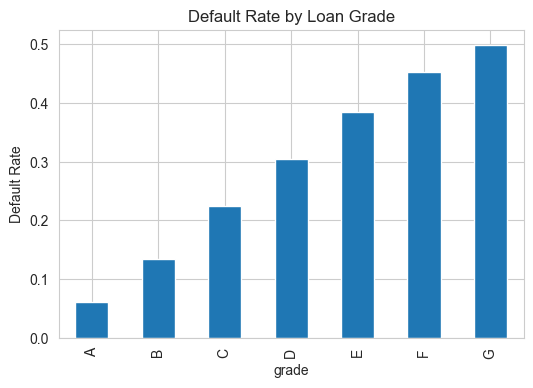

In [14]:
grade_rate = df.groupby('grade')['default_flag'].mean().loc[sorted(df['grade'].unique())]
grade_rate.plot(kind='bar', figsize=(6,4))
plt.ylabel("Default Rate")
plt.title("Default Rate by Loan Grade");

The bar chart of default rates by loan grade reveals a striking, monotonic increase in risk as credit quality declines. Grade A loans exhibit a very low default incidence (around 6 %), while Grade G loans default at roughly 50 %. Each successive grade band—A through G—sees a substantial step‐up in charge‐off probability (e.g. B ≈ 13 %, C ≈ 22 %, D ≈ 30 %, E ≈ 38 %, F ≈ 45 %). This clear gradient confirms that the issuer’s grading schema is a powerful baseline signal for borrower risk. In our modeling pipeline, we will include grade (or subgrade) as an ordinal feature but also explore more granular borrower‐level metrics to capture variations within each grade bucket.

### 4.4 Default Rate by Home Ownership

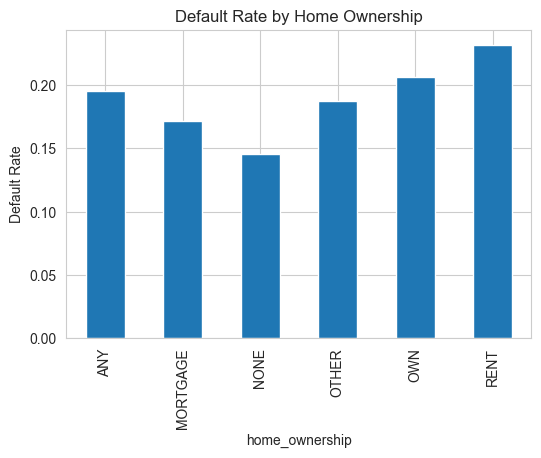

In [15]:
ho_rate = df.groupby('home_ownership')['default_flag'].mean()
ho_rate.plot(kind='bar', figsize=(6,4))
plt.ylabel("Default Rate")
plt.title("Default Rate by Home Ownership");

The bar chart of default rates by home-ownership status shows a clear gradient of borrower risk: renters exhibit the highest charge-off rate (approximately 23 %), followed by outright owners (≈21 %), the small “ANY” category (≈20 %), and “OTHER” (≈18.5 %). Borrowers holding a mortgage default at about 17 %, while those with no mortgage or rent-free arrangements (“NONE”) have the lowest incidence (≈14.5 %). These differences suggest that home-ownership status—an easily accessible origination feature—provides valuable insight into borrower stability and collateral backing. In our modeling, we can encode these categories ordinally or group rare labels (like “ANY” and “OTHER”) together to capture this signal without overfitting.  

## 5. Summary of Findings

Our EDA revealed three core takeaways to guide Phase 2. First, after cleaning text-formatted numeric fields and removing or imputing columns with excessive missingness, we’ll ensure a solid data foundation. Second, with a 19.96 % charge-off rate and highly skewed loan amounts clustered at \$5k–\$35k tiers, we’ll use AUC/precision-recall metrics, apply class weighting or sampling as needed, and treat loan size as a binned feature. Third, time-based vintage effects (crisis spikes and secular trends), along with the strong stratification of risk by loan grade (A–G) and home-ownership status, will be encoded as key predictors—complemented by additional borrower-level metrics—to build a robust, cycle-aware risk model.  